In [2281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import timedelta
import pytz
import re
import fuzzywuzzy
from fuzzywuzzy import process
from scipy import stats

In [2282]:
df = pd.read_csv("jefit.csv")

In [2283]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,### SETTING ##########################################
row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,vibration,alarm,timer,sets,targetrep,age,zonedifference,location,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
40172618,7317810,2022-07-04 14:29:07,M,29,1998-11-29,NaN,cm,kg,NaN,NaN,NaN,90,3,12,0,2,NaN,0,1,0,0,0,1,1,0,0,0
######################################################,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
### PROFILE ##########################################,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
row_id,USERID,TIMESTAMP,_id,mydate,weight,fatpercent,chest,arms,waist,calves,height,hips,thighs,shoulders,neck,forearms,logTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2361]:
df = pd.read_csv("jefit.csv", header=1)

In [2362]:
df.head()

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
0,40172618,7317810,2022-07-04 14:29:07,M,29,1998-11-29,NaN,cm,kg,NaN,...,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,### PROFILE ##################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,row_id,USERID,TIMESTAMP,_id,mydate,weight,fatpercent,chest,arms,waist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44341730,7317810,2019-04-27 18:40:26,1,2019-02-11,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2286]:
df = df.reset_index()

In [2287]:
df

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
0,40172618,7317810,2022-07-04 14:29:07,M,29,1998-11-29,NaN,cm,kg,NaN,...,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,### PROFILE ##################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,row_id,USERID,TIMESTAMP,_id,mydate,weight,fatpercent,chest,arms,waist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44341730,7317810,2019-04-27 18:40:26,1,2019-02-11,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,124267831,2022-07-23 14:53:08,7317810,825,48,1,RPE 9,NaN,2022-07-23,1658527200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5444,124267832,2022-07-23 14:53:08,7317810,826,48,1,10,NaN,2022-07-23,1658527200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5445,124267833,2022-07-23 14:53:08,7317810,827,130,1,8,NaN,2022-07-23,1658527200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5446,124941517,2022-07-30 15:34:09,7317810,828,32,1,10,NaN,2022-07-30,1659132000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2288]:
mask = df.row_id.str.contains(r"#+")
df[mask]

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
1,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,### PROFILE ##################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,### ROUTINES #################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,### WORKOUT SESSIONS #########################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,### EXERCISE LOGS ############################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5080,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5081,### EXERCISE RECORDS #########################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2289]:
sessions = df.iloc[752:1299].reset_index().drop(columns="index")
exercises = df.iloc[1299:5081].reset_index().drop(columns="index")

In [2290]:
sessions.isnull().all()

row_id                 False
USERID                 False
TIMESTAMP              False
gender                 False
currentRoutine         False
DOB                    False
name                   False
length                 False
mass                   False
dbversion              False
vibration              False
alarm                  False
timer                  False
sets                   False
targetrep              False
age                    False
zonedifference          True
location                True
use_location            True
screenon                True
auto_lock               True
lastlogs                True
preloadreps             True
exp_level               True
fit_goal                True
audio_reminder          True
audio_exercise_tips     True
audio_personal_tips     True
dtype: bool

In [2291]:
sessions.dropna(how="all", axis=1, inplace=True)

In [2292]:
sessions.columns = list(sessions.iloc[1])

In [2293]:
sessions

,rowid,_id,USERID,edit_time,day_id,total_time,workout_time,rest_time,wasted_time,total_exercise,total_weight,recordbreak,starttime,endtime,workout_mode,TIMESTAMP
0,### WORKOUT SESSIONS #########################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rowid,_id,USERID,edit_time,day_id,total_time,workout_time,rest_time,wasted_time,total_exercise,total_weight,recordbreak,starttime,endtime,workout_mode,TIMESTAMP
2,293965423,1,7317810,1550723647,0,80,0,0,80,0,0,0,1550698365,1550698445,0,2022-08-13 14:08:01
3,299772744,2,7317810,1552096282,2,3022,1052,1026,314,7,1693,7,1552060857,1552063879,0,2022-08-13 14:08:01
4,299775940,3,7317810,1552093777,8,987,372,487,0,3,3735,3,1552063987,1552064974,0,2022-08-13 14:08:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,1258600222,541,7317810,1659970932,0,3086,901,2118,0,7,14250,1,1659967842,1659970928,0,2022-08-08 15:02:12
543,1264328472,542,7317810,1660406872,0,3510,1049,1947,0,7,8098,0,1660396159,1660399669,0,2022-08-23 15:48:17
544,1274885581,543,7317810,1661276896,0,2709,480,1580,289,4,4950,0,1661266984,1661269693,0,2022-08-25 15:14:53
545,1277245795,544,7317810,1661440491,107,3500,882,2182,0,7,14034,0,1661436989,1661440489,0,2022-08-25 15:14:51


In [2294]:
sessions.drop(index=[0,1,546], columns=["USERID", "edit_time", "day_id", "workout_mode", "TIMESTAMP"], inplace=True)

In [2295]:
sessions.head()

,rowid,_id,total_time,workout_time,rest_time,wasted_time,total_exercise,total_weight,recordbreak,starttime,endtime
2,293965423,1,80,0,0,80,0,0,0,1550698365,1550698445
3,299772744,2,3022,1052,1026,314,7,1693,7,1552060857,1552063879
4,299775940,3,987,372,487,0,3,3735,3,1552063987,1552064974
5,300089644,4,3749,1169,1920,0,12,5400,12,1552145361,1552149110
6,300413531,5,3728,1378,1357,363,8,7425,8,1552239275,1552243003


In [2296]:
sessions.shape

(544, 11)

In [2297]:
sessions = sessions.astype({"_id":int, 'total_time': int, 'wasted_time':int, 'workout_time':int, 'rest_time':int, 'total_exercise':int, 'total_weight':float, 'recordbreak':int})

In [2298]:
sessions.set_index("_id", inplace=True)

In [2299]:
sessions["starttime"] = pd.to_datetime(sessions["starttime"], unit="s", utc=True)
sessions["endtime"] = pd.to_datetime(sessions["endtime"], unit="s", utc=True)

In [2300]:
sessions.head()

,rowid,total_time,workout_time,rest_time,wasted_time,total_exercise,total_weight,recordbreak,starttime,endtime
_id,,,,,,,,,,
1,293965423,80,0,0,80,0,0.0,0,2019-02-20 21:32:45+00:00,2019-02-20 21:34:05+00:00
2,299772744,3022,1052,1026,314,7,1693.0,7,2019-03-08 16:00:57+00:00,2019-03-08 16:51:19+00:00
3,299775940,987,372,487,0,3,3735.0,3,2019-03-08 16:53:07+00:00,2019-03-08 17:09:34+00:00
4,300089644,3749,1169,1920,0,12,5400.0,12,2019-03-09 15:29:21+00:00,2019-03-09 16:31:50+00:00
5,300413531,3728,1378,1357,363,8,7425.0,8,2019-03-10 17:34:35+00:00,2019-03-10 18:36:43+00:00


In [2301]:
cro_tz = pytz.timezone('Europe/Zagreb')

In [2302]:
sessions["starttime"] = sessions["starttime"].map(lambda x: x.astimezone(cro_tz))
sessions["endtime"] = sessions["endtime"].map(lambda x: x.astimezone(cro_tz))

In [2303]:
for col in ["total_time", "workout_time", "rest_time", "wasted_time"]:
    sessions[col] = sessions[col]/60

In [2304]:
sessions

,rowid,total_time,workout_time,rest_time,wasted_time,total_exercise,total_weight,recordbreak,starttime,endtime
_id,,,,,,,,,,
1,293965423,1.333333,0.000000,0.000000,1.333333,0,0.0,0,2019-02-20 22:32:45+01:00,2019-02-20 22:34:05+01:00
2,299772744,50.366667,17.533333,17.100000,5.233333,7,1693.0,7,2019-03-08 17:00:57+01:00,2019-03-08 17:51:19+01:00
3,299775940,16.450000,6.200000,8.116667,0.000000,3,3735.0,3,2019-03-08 17:53:07+01:00,2019-03-08 18:09:34+01:00
4,300089644,62.483333,19.483333,32.000000,0.000000,12,5400.0,12,2019-03-09 16:29:21+01:00,2019-03-09 17:31:50+01:00
5,300413531,62.133333,22.966667,22.616667,6.050000,8,7425.0,8,2019-03-10 18:34:35+01:00,2019-03-10 19:36:43+01:00
...,...,...,...,...,...,...,...,...,...,...
540,1249728611,57.416667,16.300000,30.450000,0.166667,7,12007.0,2,2022-07-30 16:36:36+02:00,2022-07-30 17:34:01+02:00
541,1258600222,51.433333,15.016667,35.300000,0.000000,7,14250.0,1,2022-08-08 16:10:42+02:00,2022-08-08 17:02:08+02:00
542,1264328472,58.500000,17.483333,32.450000,0.000000,7,8098.0,0,2022-08-13 15:09:19+02:00,2022-08-13 16:07:49+02:00


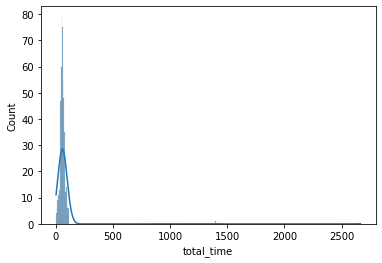

In [2305]:
sns.histplot(sessions["total_time"], kde=True);

In [2306]:
sessions.drop(index=sessions.query("total_time>120 | total_time<5").index, inplace=True)

<AxesSubplot:xlabel='total_time', ylabel='Count'>

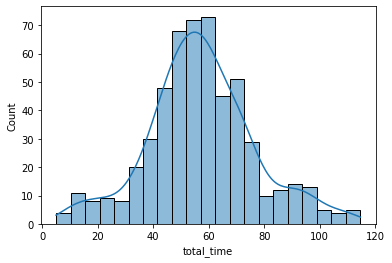

In [2307]:
sns.histplot(sessions["total_time"], kde=True)

<AxesSubplot:xlabel='starttime', ylabel='Count'>

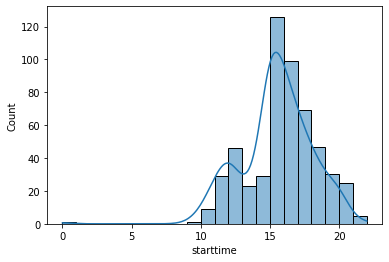

In [2308]:
sns.histplot(sessions["starttime"].dt.hour, binwidth=1, kde=True)

In [2309]:
sessions.drop(index=sessions.query("~(8 < starttime.dt.hour < 23)").index, inplace=True)

<AxesSubplot:xlabel='starttime', ylabel='Count'>

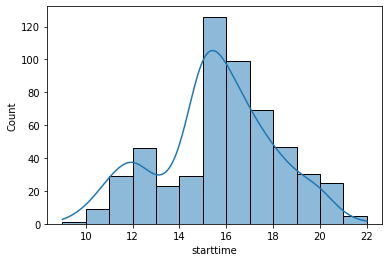

In [2310]:
sns.histplot(sessions["starttime"].dt.hour, binwidth=1, kde=True)

In [2311]:
sessions = sessions.reset_index()
sessions

,_id,rowid,total_time,workout_time,rest_time,wasted_time,total_exercise,total_weight,recordbreak,starttime,endtime
0,2,299772744,50.366667,17.533333,17.100000,5.233333,7,1693.0,7,2019-03-08 17:00:57+01:00,2019-03-08 17:51:19+01:00
1,3,299775940,16.450000,6.200000,8.116667,0.000000,3,3735.0,3,2019-03-08 17:53:07+01:00,2019-03-08 18:09:34+01:00
2,4,300089644,62.483333,19.483333,32.000000,0.000000,12,5400.0,12,2019-03-09 16:29:21+01:00,2019-03-09 17:31:50+01:00
3,5,300413531,62.133333,22.966667,22.616667,6.050000,8,7425.0,8,2019-03-10 18:34:35+01:00,2019-03-10 19:36:43+01:00
4,6,300426805,54.933333,8.650000,9.433333,32.350000,3,562.5,0,2019-03-10 19:38:10+01:00,2019-03-10 20:33:06+01:00
...,...,...,...,...,...,...,...,...,...,...,...
533,540,1249728611,57.416667,16.300000,30.450000,0.166667,7,12007.0,2,2022-07-30 16:36:36+02:00,2022-07-30 17:34:01+02:00
534,541,1258600222,51.433333,15.016667,35.300000,0.000000,7,14250.0,1,2022-08-08 16:10:42+02:00,2022-08-08 17:02:08+02:00
535,542,1264328472,58.500000,17.483333,32.450000,0.000000,7,8098.0,0,2022-08-13 15:09:19+02:00,2022-08-13 16:07:49+02:00
536,543,1274885581,45.150000,8.000000,26.333333,4.816667,4,4950.0,0,2022-08-23 17:03:04+02:00,2022-08-23 17:48:13+02:00


In [2312]:
exercises

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
0,### EXERCISE LOGS ############################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,row_id,USERID,TIMESTAMP,belongSys,logs,_id,record,mydate,eid,ename,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2405682034,7317810,2019-04-27 18:40:26,1,"15x6,15x6,15x6,15x6",1,18,2019-03-08,2,Barbell Bench Press,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2405701074,7317810,2019-04-27 18:40:26,1,"10x12,10x10,10x8",2,14,2019-03-08,165,Dumbbell Incline Fly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2405714085,7317810,2019-04-27 18:40:26,1,"10x8,6x10,6x10,6x10",3,12.66,2019-03-08,884,Dumbbell Standing Press,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,9244894351,7317810,2022-08-25 14:56:06,1,"56x10,56x10,56x10",3778,74.66,2022-08-25,199,Barbell Romanian Deadlift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778,9245005301,7317810,2022-08-25 15:03:48,1,"8x6,8x6,8x6",3779,9.6,2022-08-25,24,Dip,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3779,9245046281,7317810,2022-08-25 15:08:29,1,"140x10,140x10,140x10",3780,186.66,2022-08-25,145,Standing Calf Raises,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3780,9245082460,7317810,2022-08-25 15:14:50,1,"9x10,9x10,9x10",3781,12,2022-08-25,100,Dumbbell Bicep Curl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2313]:
exercises.dropna(how="all", axis=1, inplace=True)
exercises.columns = list(exercises.iloc[1])

In [2314]:
exercises

,row_id,USERID,TIMESTAMP,belongSys,logs,_id,record,mydate,eid,ename,day_item_id,belongsession,logTime,interval_logs
0,### EXERCISE LOGS ############################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,row_id,USERID,TIMESTAMP,belongSys,logs,_id,record,mydate,eid,ename,day_item_id,belongsession,logTime,interval_logs
2,2405682034,7317810,2019-04-27 18:40:26,1,"15x6,15x6,15x6,15x6",1,18,2019-03-08,2,Barbell Bench Press,19,2,1552060857,NaN
3,2405701074,7317810,2019-04-27 18:40:26,1,"10x12,10x10,10x8",2,14,2019-03-08,165,Dumbbell Incline Fly,20,2,1552061079,NaN
4,2405714085,7317810,2019-04-27 18:40:26,1,"10x8,6x10,6x10,6x10",3,12.66,2019-03-08,884,Dumbbell Standing Press,21,2,1552061512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,9244894351,7317810,2022-08-25 14:56:06,1,"56x10,56x10,56x10",3778,74.66,2022-08-25,199,Barbell Romanian Deadlift,1337,544,1661439007,"0,0,0"
3778,9245005301,7317810,2022-08-25 15:03:48,1,"8x6,8x6,8x6",3779,9.6,2022-08-25,24,Dip,1304,544,1661439504,"0,3,0"
3779,9245046281,7317810,2022-08-25 15:08:29,1,"140x10,140x10,140x10",3780,186.66,2022-08-25,145,Standing Calf Raises,1305,544,1661439926,"0,0,0"
3780,9245082460,7317810,2022-08-25 15:14:50,1,"9x10,9x10,9x10",3781,12,2022-08-25,100,Dumbbell Bicep Curl,1306,544,1661440205,"0,0,0"


In [2315]:
exercises.drop(index=[0,1,3781], columns=["row_id", "USERID", "belongSys", "_id", "TIMESTAMP", "day_item_id", "logTime", "interval_logs"], inplace=True)

In [2316]:
exercises = exercises.reset_index(drop=True)
exercises

,logs,record,mydate,eid,ename,belongsession
0,"15x6,15x6,15x6,15x6",18,2019-03-08,2,Barbell Bench Press,2
1,"10x12,10x10,10x8",14,2019-03-08,165,Dumbbell Incline Fly,2
2,"10x8,6x10,6x10,6x10",12.66,2019-03-08,884,Dumbbell Standing Press,2
3,"6x9,6x10,6x10,6x10",8,2019-03-08,32,Dumbbell Lateral Raise,2
4,"9x12,9x12,9x12,9x9",12.6,2019-03-08,250,Cable Triceps Pushdown,2
...,...,...,...,...,...,...
3774,"40x10,40x10,40x10",53.33,2022-08-25,86,Wide Grip Lat Pulldown,544
3775,"56x10,56x10,56x10",74.66,2022-08-25,199,Barbell Romanian Deadlift,544
3776,"8x6,8x6,8x6",9.6,2022-08-25,24,Dip,544
3777,"140x10,140x10,140x10",186.66,2022-08-25,145,Standing Calf Raises,544


In [2317]:
exercises["sets"] = exercises["logs"].apply(lambda x: len(x.split(",")))

In [2318]:
exercises.sample(10)

,logs,record,mydate,eid,ename,belongsession,sets
1771,"60x5,60x5,60x5",70,2020-08-27,2,Barbell Bench Press,233,3
1911,"41x15,41x15,41x15",61.5,2020-10-10,130,NaN,253,3
822,"16.25x15,18.75x15",28.12,2019-07-16,874,Cable Rope Face Pull,109,2
1951,"10x20,10x20,10x20",16.66,2020-10-21,95,NaN,258,3
1679,"60x5,60x5,60x5",70,2020-07-23,4,Barbell Close Grip Bench Press,220,3
1799,"85x8,85x8,85x8",107.66,2020-09-04,93,Barbell Deadlift,237,3
2708,"8x20,8x20,8x20",13.33,2021-08-21,32,Dumbbell Lateral Raise,376,3
1949,"87.5x10,87.5x10,87.5x10",116.66,2020-10-21,86,NaN,258,3
2408,"59x15,59x15",88.5,2021-05-11,216,Thigh Abductor,327,2
3068,"10x10,10x10",13.33,2021-11-27,221,EZ Bar Tricep Extension,431,2


In [2319]:
exercises["reps"] = exercises["logs"].apply(lambda x: sum([int(rep) for rep in re.findall(r"\dx([\d]{,2})", x)]))

In [2320]:
exercises.sample(10)

,logs,record,mydate,eid,ename,belongsession,sets,reps
2230,"15x10,12.5x10,12.5x10",20,2021-03-24,1040,Dumbbell Incline Bench Two Arm Row,298,3,30
2487,"10x14,10x14,10x10",14,2021-05-29,57,Air Bike,339,3,38
0,"15x6,15x6,15x6,15x6",18,2019-03-08,2,Barbell Bench Press,2,4,24
3134,"9x12,9x12",12.6,2021-12-17,106,Dumbbell Incline Curl,442,2,24
1182,"5x10,5x10,5x9",6.66,2019-10-16,221,EZ Bar Triceps Extension,153,3,29
2812,"16.25x12,16.25x12,16.25x12",22.75,2021-09-18,375,Dumbbell Straight Arm Pullover,391,3,36
2691,"150x8,150x8,150x8",190,2021-08-19,145,Standing Calf Raises,373,3,24
1077,"16x7,16x7,16x7,16x7",19.73,2019-09-12,495,Smith Machine Single Leg Split Squat,142,4,28
932,"18.75x15,18.75x15,6.25x15,6.25x15",28.12,2019-08-01,874,Cable Rope Face Pull,124,4,60
373,"20x12,20x11,20x8",28,2019-05-02,90,Dumbbell One Arm Row,62,3,31


In [2321]:
exercises["total_weight"] = exercises["logs"].apply(lambda x: sum([float(weight) for weight in re.findall(r"([.\d]+)x", x)]))
exercises["max_weight"] = exercises["logs"].apply(lambda x: max([float(weight) for weight in re.findall(r"([.\d]+)x", x)]))

In [2322]:
exercises.sample(10)

,logs,record,mydate,eid,ename,belongsession,sets,reps,total_weight,max_weight
2374,"90x3,90x3,90x3",99,2021-05-03,93,Barbell Deadlift,322,3,9,270.0,90.0
672,"12.5x12,12.5x12,12.5x12",17.5,2019-06-20,495,Smith Machine Single Leg Split Squat,94,3,36,37.5,12.5
1397,"22.5x12,22.5x12,22.5x12",31.49,2020-01-10,479,Kettlebell Goblet Squat,180,3,36,67.5,22.5
2000,"18x20,18x20,18x20",29.99,2020-10-29,878,Machine Reverse Flyes,265,3,60,54.0,18.0
1199,"11.5x12,11.5x12,3.5x12,3.5x12",16.09,2019-10-21,874,Cable Rope Face Pull,155,4,48,30.0,11.5
1618,"14x12,14x12,14x12",19.59,2020-06-29,1040,Dumbbell Incline Bench Two Arm Row,211,3,36,42.0,14.0
731,"14x12,14x12,14x12",19.59,2019-07-01,495,Smith Machine Single Leg Split Squat,100,3,36,42.0,14.0
1316,"10x8,10x8,10x7,10x7",12.66,2019-12-02,1127,Cable One Arm Lateral Raise,169,4,30,40.0,10.0
2826,"40x12,40x12,40x12",56,2021-09-21,250,Cable Triceps Pushdown,393,3,36,120.0,40.0
441,"45.5x15,41x22,41x29",80.63,2019-05-13,216,Thigh Abductor,70,3,66,127.5,45.5


In [2323]:
def one_RM(row):
    reps = [int(x) for x in re.findall(r"\dx([\d]{,2})", row)]
    weight = [float(x) for x in re.findall(r"([.\d]+)x", row)]
    weightxreps = list(zip(weight,reps))
    
    lst=[]
    for volume in weightxreps:
        one_RM = volume[0] * (1 + (volume[1]/ 30))
        lst.append(round(one_RM,0))
    return max(lst)
    

In [2324]:
exercises["one_RM"] = exercises["logs"].apply(one_RM)

In [2325]:
exercises.sample(10)

,logs,record,mydate,eid,ename,belongsession,sets,reps,total_weight,max_weight,one_RM
3663,"95x4,95x4",107.66,2022-06-10,12,Barbell Squat,524,2,8,190.0,95.0,108.0
1195,"20x8,20x8,20x8,20x8",25.33,2019-10-21,2,Barbell Bench Press,155,4,32,80.0,20.0,25.0
950,"38x11,38x11,38x11,38x11",51.93,2019-08-06,161,Seated Leg Curl,126,4,44,152.0,38.0,52.0
927,"3x14,3x14,3x14,3x14",4.4,2019-07-29,236,Dumbbell Lying Supine Two Arm Triceps Extension,123,4,56,12.0,3.0,4.0
2340,"1x8,1x8,1x8",1.26,2021-04-22,24,Dip,316,3,24,3.0,1.0,1.0
978,"30x8,30x8,30x8,30x8",38,2019-08-16,93,Barbell Deadlift,131,4,32,120.0,30.0,38.0
1190,"20x14,20x14,20x14,20x14",29.33,2019-10-18,479,Kettlebell Goblet Squat,154,4,56,80.0,20.0,29.0
1950,"41x20,41x20,41x20",68.33,2020-10-21,216,NaN,258,3,60,123.0,41.0,68.0
626,"40x15,40x9,40x9,40x6",60,2019-06-14,250,Cable Triceps Pushdown,89,4,39,160.0,40.0,60.0
89,"10x20,10x20",16.66,2019-03-21,136,Dumbbell Lunges,15,2,40,20.0,10.0,17.0


In [2326]:
# exercises.loc[exercises["eid"]=="2", "ename"][0]

In [2327]:
# def fill_enames(row):
    
#     eid = row["eid"]
#     ename = exercises.loc[exercises["eid"]==str(eid), "ename"][0]
    

In [2328]:
# exercises.loc[exercises["ename"].isnull()]

In [2329]:
# exercises["ename"] = exercises.ename.astype("str")

In [2330]:
exercise_list = list(exercises["ename"].dropna().unique())
exercise_list.sort()

In [2331]:
def flat_list(lst):
    return [i for item in lst for i in item]

In [2332]:
# ename="Cable One Arm Tricep Extension"
# eid = exercises.loc[exercises.ename==ename, "eid"].unique()[0]
# print(eid)
# enames = list(exercises.dropna().loc[exercises.eid==eid, "ename"].unique())
# ename in enames
# enames

In [2333]:
# check_conditions(exercises, ("Dumbbell Alternating Bicep Curl", 55), 90)

In [2334]:
# def eid_not_unique(df, exercise):
#     df = df.dropna()
    
#     eid = df.loc[df.ename==exercise, "eid"].unique()[0]
#     enames = list(df.loc[df.eid==eid, "ename"].unique())
    
#     return enames

In [2335]:
# def check_conditions(df, match, limit):
#     df = df.dropna()
    
#     condition1 = match[1]>=limit
    
#     eid = df.loc[df.ename==match[0], "eid"].unique()[0]
#     enames = list(df.loc[df.eid==eid, "ename"].unique())
#     condition2 = len(enames)>1
#     print(enames)
    
#     return (condition1 or condition2)
    

In [2336]:
top_matches_lst = []

for exercise in exercise_list:
    
    if len(top_matches_lst) > 0:
    #     if exercise in list(zip(*top_matches_lst[len(top_matches_lst)-1]))[0]:
        if exercise in flat_list(top_matches_lst):
            continue
    
#     enames = eid_not_unique(exercises, exercise)
    
#     if len(enames) > 1:
#         top_matches = enames
    
 
    
    
    matches = fuzzywuzzy.process.extract(exercise, exercise_list, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    
    # top_matches = [match for match in matches if check_conditions(exercises, match, 90)]
    
#     for match in matches:
    
#         condition1 = match[1]>=90
    
#         eid = exercises.loc[exercises.ename==match[0], "eid"].unique()[0]
#         enames = list(exercises.loc[exercises.eid==eid, "ename"])
#         condition2 = match[0] in enames and match[1]>=85
        
#         if condition1 or condition2:
#             top_matches.append(match[0])
    
    top_matches = [match[0] for match in matches if match[1]>=90]
    
    if len(top_matches)>1:
        top_matches_lst.append(top_matches)

In [2337]:
top_matches_lst

[["2'' Block Pull",
  "3'' Block Pull",
  "4'' Block Pull",
  "5'' Block Pull",
  "6'' Block Pull"],
 ['Barbell Bent Over Row', 'Barbell Bent-Over Row'],
 ['Cable Rope Overhead Tricep Extension',
  'Cable Rope Overhead Triceps Extension'],
 ['Cable V Bar Pull Down', 'Cable V Bar Pull-down'],
 ['Chin Up', 'Chin-Up'],
 ['Deep Push Up', 'Deep Push-Up'],
 ['Dumbbell Alternate Bicep Curl', 'Dumbbell Alternating Bicep Curl'],
 ['Dumbbell Bent Over Row', 'Dumbbell Bent-Over Row'],
 ['Dumbbell Concentration Curl', 'Dumbbell Concentration Curls'],
 ['Dumbbell Hammer Curl', 'Dumbbell Hammer Curls'],
 ['Dumbbell Lying Supine Two Arm Triceps Extension',
  'Dumbbell Supine Two-Arm Triceps Extension'],
 ['Dumbbell One Arm Row', 'Dumbbell One-Arm Row'],
 ['Dumbbell One Arm Triceps Extension', 'Dumbbell One-Arm Tricep Extension'],
 ['EZ Bar Tricep Extension', 'EZ Bar Triceps Extension'],
 ['Hammer Grip Pull Up', 'Hammer Grip Pull-Up'],
 ['Jackknife Sit up', 'Jackknife Sit-Up'],
 ['Leg Extension', 'Leg

In [2338]:
for duplicates in top_matches_lst:
    # duplicates, _ = zip(*match)
    mask = exercises["ename"].isin(duplicates)
    exercises.loc[mask, "ename"] = duplicates[-1]

In [2339]:
def fillna_with_eid(row):
    
    if row["ename"] is np.nan:
        eid = row["eid"] 
        ename = exercises.loc[exercises["eid"]==eid, "ename"].dropna().iloc[0]
        
        row["ename"] = ename
    
    return row

In [2340]:
exercises = exercises.apply(fillna_with_eid, axis=1)

In [2341]:
exercises[exercises.isnull().any(axis=1)]

,logs,record,mydate,eid,ename,belongsession,sets,reps,total_weight,max_weight,one_RM


In [2342]:
exercise_list = list(exercises.ename.unique())
exercise_list.sort()
exercise_list

["6'' Block Pull",
 'Ab Crunch Machine',
 'Air Bike',
 'Arm Circles',
 'Back Hyperextension',
 'Barbell Bench Press',
 'Barbell Bench Squat ',
 'Barbell Bent One Arm Row',
 'Barbell Bent-Over Row',
 'Barbell Close Grip Bench Press',
 'Barbell Deadlift',
 'Barbell Front Squat',
 'Barbell Hip Thrust',
 'Barbell Military Press',
 'Barbell One-Arm Row',
 'Barbell Preacher Curl',
 'Barbell Rack Pulls',
 'Barbell Romanian Deadlift',
 'Barbell Single Leg Squat',
 'Barbell Squat',
 'Barbell Squat To A Bench',
 'Barbell Standing Military Press',
 'Bench Press Machine',
 'Cable Biceps Curl',
 'Cable Cross Over',
 'Cable Crunch',
 'Cable Lateral Raise',
 'Cable Lower Chest Raise',
 'Cable One Arm Lateral Raise',
 'Cable One Arm Standing Overhead Tricep Extension',
 'Cable One Arm Tricep Extension',
 'Cable One-Arm Lat Pulldown',
 'Cable Pull Through',
 'Cable Reverse Crunch',
 'Cable Reverse Wood Chops',
 'Cable Rope Face Pull',
 'Cable Rope Overhead Triceps Extension',
 'Cable Seated Row',
 'Cab

In [2343]:
exercises.loc[exercises.total_weight==0]

,logs,record,mydate,eid,ename,belongsession,sets,reps,total_weight,max_weight,one_RM
6,"0x0,0x0,0x0,0x5,0x60,0x0,0x0,0x0,0x5,0x60",0,2019-03-08,2,Flat Bench Dumbbell Hold,2,10,130,0.0,0.0,0.0
21,"0x0,0x0,0x0,0x0,0x300",0,2019-03-10,310,Elliptical Training,5,5,30,0.0,0.0,0.0
30,"0x15,0x15,0x15",0,2019-03-10,1273,Parallel Bar Leg Raise,6,3,45,0.0,0.0,0.0
44,"0x16,0x16,0x16",0,2019-03-12,1273,Parallel Bar Leg Raise,8,3,48,0.0,0.0,0.0
54,"0x0,0x0,0x0,0x0,0x300",0,2019-03-14,310,Elliptical Training,10,5,30,0.0,0.0,0.0
63,"0x16,0x16,0x16",0,2019-03-14,1273,Parallel Bar Leg Raise,11,3,48,0.0,0.0,0.0
71,"0x0,0x0,0x0,0x5,0x70,0x0,0x0,0x0,0x5,0x70",0,2019-03-19,2,Flat Bench Dumbbell Hold,12,10,150,0.0,0.0,0.0
74,"0x15,0x15,0x15",0,2019-03-19,1273,Parallel Bar Leg Raise,13,3,45,0.0,0.0,0.0
86,"0x0,0x0,0x0,0x0,0x300",0,2019-03-21,310,Elliptical Training,15,5,30,0.0,0.0,0.0
96,"0x15,0x15,0x15",0,2019-03-21,1273,Parallel Bar Leg Raise,16,3,45,0.0,0.0,0.0


In [2344]:
# cardio = ["Elliptical Training", "Indoor Cycling"]

In [2345]:
# indecis = exercises.loc[exercises.ename.isin(cardio)].index

In [2346]:
# exercises.drop(index=indecis, inplace=True)

In [2347]:
# exercises.reset_index(drop=True, inplace=True)

In [2348]:
exercises.loc[exercises.total_weight==0]

,logs,record,mydate,eid,ename,belongsession,sets,reps,total_weight,max_weight,one_RM
6,"0x0,0x0,0x0,0x5,0x60,0x0,0x0,0x0,0x5,0x60",0,2019-03-08,2,Flat Bench Dumbbell Hold,2,10,130,0.0,0.0,0.0
21,"0x0,0x0,0x0,0x0,0x300",0,2019-03-10,310,Elliptical Training,5,5,30,0.0,0.0,0.0
30,"0x15,0x15,0x15",0,2019-03-10,1273,Parallel Bar Leg Raise,6,3,45,0.0,0.0,0.0
44,"0x16,0x16,0x16",0,2019-03-12,1273,Parallel Bar Leg Raise,8,3,48,0.0,0.0,0.0
54,"0x0,0x0,0x0,0x0,0x300",0,2019-03-14,310,Elliptical Training,10,5,30,0.0,0.0,0.0
63,"0x16,0x16,0x16",0,2019-03-14,1273,Parallel Bar Leg Raise,11,3,48,0.0,0.0,0.0
71,"0x0,0x0,0x0,0x5,0x70,0x0,0x0,0x0,0x5,0x70",0,2019-03-19,2,Flat Bench Dumbbell Hold,12,10,150,0.0,0.0,0.0
74,"0x15,0x15,0x15",0,2019-03-19,1273,Parallel Bar Leg Raise,13,3,45,0.0,0.0,0.0
86,"0x0,0x0,0x0,0x0,0x300",0,2019-03-21,310,Elliptical Training,15,5,30,0.0,0.0,0.0
96,"0x15,0x15,0x15",0,2019-03-21,1273,Parallel Bar Leg Raise,16,3,45,0.0,0.0,0.0


In [2349]:
timed_exercises  = exercises.query("total_weight==0 & ename != 'Parallel Bar Leg Raise'").index
exercises.drop(index=timed_exercises, inplace=True)
exercises.reset_index(drop=True, inplace=True)

In [2350]:
mask = exercises.total_weight==0
indecis = exercises[mask].index

In [2351]:
exercises.loc[mask, "logs"] = exercises.loc[mask, "logs"].replace(r"([0])(?=x\d+)", "1", regex=True)

In [2352]:
exercises.loc[indecis, "total_weight"] = exercises.loc[indecis, "logs"].apply(lambda x: sum([float(weight) for weight in re.findall(r"([.\d]+)x", x)]))
exercises.loc[indecis, "max_weight"] = exercises.loc[indecis, "logs"].apply(lambda x: max([float(weight) for weight in re.findall(r"([.\d]+)x", x)]))

In [2353]:
exercises.loc[indecis, "one_RM"] = exercises.loc[indecis, "logs"].apply(one_RM)

In [2354]:
exercises["mydate"] = pd.to_datetime(exercises["mydate"])
exercises.head()

,logs,record,mydate,eid,ename,belongsession,sets,reps,total_weight,max_weight,one_RM
0,"15x6,15x6,15x6,15x6",18,2019-03-08,2,Barbell Bench Press,2,4,24,60.0,15.0,18.0
1,"10x12,10x10,10x8",14,2019-03-08,165,Dumbbell Incline Fly,2,3,30,30.0,10.0,14.0
2,"10x8,6x10,6x10,6x10",12.66,2019-03-08,884,Dumbbell Standing Press,2,4,38,28.0,10.0,13.0
3,"6x9,6x10,6x10,6x10",8,2019-03-08,32,Dumbbell Lateral Raise,2,4,39,24.0,6.0,8.0
4,"9x12,9x12,9x12,9x9",12.6,2019-03-08,250,Cable Triceps Pushdown,2,4,45,36.0,9.0,13.0


In [2355]:
mask = exercises.ename.str.contains("Barbell")
ex_list = exercises.loc[mask].ename.unique()
ex_list

array(['Barbell Bench Press', 'Barbell Squat',
       'Barbell Romanian Deadlift', 'Barbell Deadlift',
       'Barbell Hip Thrust', 'Barbell Preacher Curl',
       'Barbell Standing Military Press',
       'Barbell Close Grip Bench Press', 'Barbell Bent One Arm Row',
       'Barbell Rack Pulls', 'Barbell Bent-Over Row',
       'Pause Barbell Bench Press', 'Barbell Military Press',
       'Barbell Squat To A Bench', 'Barbell Single Leg Squat',
       'Barbell Bench Squat ', 'Barbell One-Arm Row',
       'Barbell Front Squat'], dtype=object)

In [2356]:
# ex="Barbell Hip Thrust"
# mean = exercises.loc[exercises.ename==ex, "one_RM"].mean()
# std = exercises.loc[exercises.ename==ex, "one_RM"].std()
# lower = mean - std
# # lower = exercises.loc[exercises.ename==ex, "one_RM"].quantile(0.25)
# print(lower)
# mask = (exercises["one_RM"]<mean) & (exercises.ename==ex) & (exercises.mydate < pd.to_datetime("2020-03-01")) 
# exercises.loc[mask]

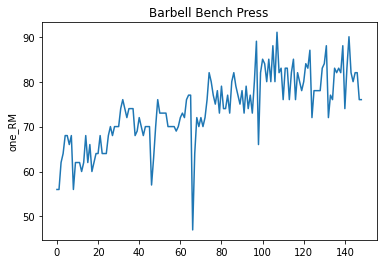

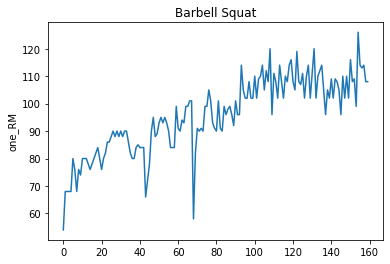

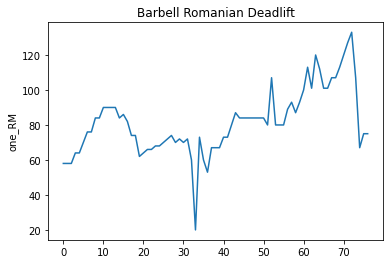

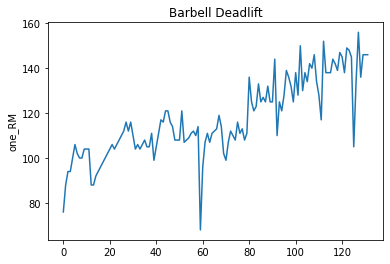

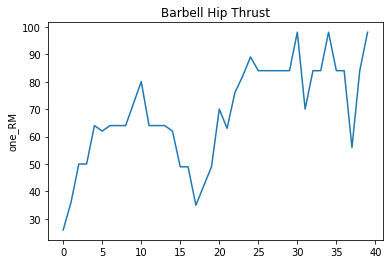

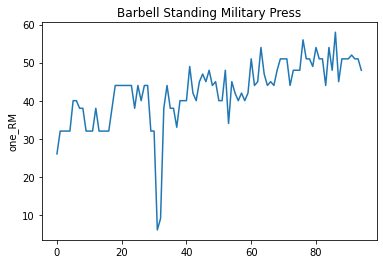

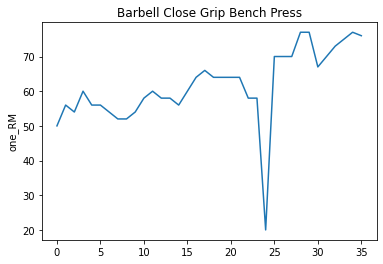

In [2357]:
for ex in ex_list:
    
    mean = exercises.loc[exercises.ename==ex, "one_RM"].mean()
    std = exercises.loc[exercises.ename==ex, "one_RM"].std()
    lower = mean - std
    
   
    
    mask = (exercises["one_RM"]<mean) & (exercises.ename==ex)  & (exercises.mydate < pd.to_datetime("2020-03-01")) 
    
    exercises.loc[mask, "one_RM"] = exercises.loc[mask, "one_RM"]*2+20
    
    data = exercises.loc[exercises.ename==ex]
    
    if data.shape[0] < 30:
        continue
        
    sns.lineplot(data=data, y="one_RM", x=range(data.shape[0])).set(title=ex)
    plt.show();

In [2358]:
mask = exercises.ename.str.contains("EZ")
ex_list = exercises.loc[mask].ename.unique()
ex_list

array(['EZ Bar Curl', 'EZ Bar Triceps Extension'], dtype=object)

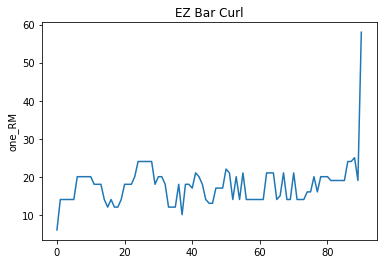

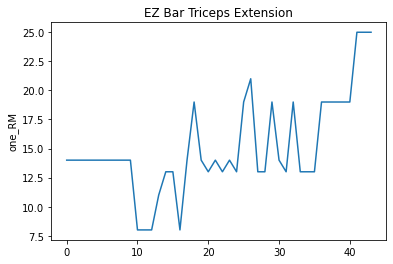

In [2359]:
for ex in ex_list:
    
    mean = exercises.loc[exercises.ename==ex, "one_RM"].mean()
    std = exercises.loc[exercises.ename==ex, "one_RM"].std()
    lower = mean - std
    
   
    
    mask = (exercises["one_RM"]<mean) & (exercises.ename==ex)  & (exercises.mydate < pd.to_datetime("2020-03-01")) 
    
    exercises.loc[mask, "one_RM"] = exercises.loc[mask, "one_RM"]*2
    
    data = exercises.loc[exercises.ename==ex]
    
    if data.shape[0] < 30:
        continue
        
    sns.lineplot(data=data, y="one_RM", x=range(data.shape[0])).set(title=ex)
    plt.show();

In [2360]:
exercises

,logs,record,mydate,eid,ename,belongsession,sets,reps,total_weight,max_weight,one_RM
0,"15x6,15x6,15x6,15x6",18,2019-03-08,2,Barbell Bench Press,2,4,24,60.0,15.0,56.0
1,"10x12,10x10,10x8",14,2019-03-08,165,Dumbbell Incline Fly,2,3,30,30.0,10.0,14.0
2,"10x8,6x10,6x10,6x10",12.66,2019-03-08,884,Dumbbell Standing Press,2,4,38,28.0,10.0,13.0
3,"6x9,6x10,6x10,6x10",8,2019-03-08,32,Dumbbell Lateral Raise,2,4,39,24.0,6.0,8.0
4,"9x12,9x12,9x12,9x9",12.6,2019-03-08,250,Cable Triceps Pushdown,2,4,45,36.0,9.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
3735,"40x10,40x10,40x10",53.33,2022-08-25,86,Wide Grip Lat Pulldown,544,3,30,120.0,40.0,53.0
3736,"56x10,56x10,56x10",74.66,2022-08-25,199,Barbell Romanian Deadlift,544,3,30,168.0,56.0,75.0
3737,"8x6,8x6,8x6",9.6,2022-08-25,24,Dip,544,3,18,24.0,8.0,10.0
3738,"140x10,140x10,140x10",186.66,2022-08-25,145,Standing Calf Raises,544,3,30,420.0,140.0,187.0
